In [1]:
import numpy as np
import pandas as pd

import ast

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")


In [2]:
file_list = [
    "../D_Evaluate/Close_source/PostProcess_GPT_4o_mini_evaluate.csv",
    "../D_Evaluate/Close_source/PostProcess_Gemini_2.0_flash_evaluate.csv",
    "../D_Evaluate/Close_source/PostProcess_Deepseek_V3_evaluate.csv",
    "../D_Evaluate/Close_source/PostProcess_Claude_3.5_Haiku_evaluate.csv",

    "../D_Evaluate/Open_source/General_support/llama-3-7b_evaluate.csv",
    "../D_Evaluate/Open_source/General_support/mistral-7b-instruct-v0.3_evaluate.csv",
    "../D_Evaluate/Open_source/General_support/qwen2.5-7b-instruct-1m_evaluate.csv",
    "../D_Evaluate/Open_source/General_support/vicuna-7b-v1.5_evaluate.csv",
    "../D_Evaluate/Open_source/General_support/wizardlm-2-7b_evaluate.csv",

    "../D_Evaluate/Open_source/Vietnamese_support/vistral-7b-chat_evaluate.csv",
    "../D_Evaluate/Open_source/Vietnamese_support/qwen2.5-7b-instruct-viet-sft_evaluate.csv",
]

file_list = [
    "../DK_Evaluate/Close_source/PostProcess_GPT_4o_mini_evaluate.csv",
    "../DK_Evaluate/Close_source/PostProcess_Gemini_2.0_flash_evaluate.csv",
    "../DK_Evaluate/Close_source/PostProcess_Deepseek_V3_evaluate.csv",
    "../DK_Evaluate/Close_source/PostProcess_Claude_3.5_Haiku_evaluate.csv",

    # "Open_source/General_support/llama-3-7b_evaluate.csv",
    # "Open_source/General_support/mistral-7b-instruct-v0.3_evaluate.csv",
    # "Open_source/General_support/qwen2.5-7b-instruct-1m_evaluate.csv",
    # "Open_source/General_support/vicuna-7b-v1.5_evaluate.csv",
    # "Open_source/General_support/wizardlm-2-7b_evaluate.csv",

    # "Open_source/Vietnamese_support/vistral-7b-chat_evaluate.csv",
    # "Open_source/Vietnamese_support/qwen2.5-7b-instruct-viet-sft_evaluate.csv",
]

In [3]:
def castString(s):
    if type(s)!=str:
        return 'không'
    
    s = s.strip().lower()
        
    position1 = s.find('có')
    position2 = s.find('không')

    if position1 != -1 and position2 != -1:
        if position1 <= position2:
            return 'có'
        else:
            return 'không'
        
    if 'có' in s:
        return 'có'
    if 'không' in s:
        return 'không'
    
    if "yes" in s:
        return "có"
    if "no" in s:
        return "không"
    
    return 'không'


In [4]:
data = {}

def demoPlot1(file_name):
    df = pd.read_csv(file_name)

    df['danhGiaDung'] = df['danhGiaDung'].apply(castString)
    df['danhGiaAoGiac'] = df['danhGiaAoGiac'].apply(castString)

    name = file_name.split("/")[-1].split("_evaluate")[0].split('PostProcess_')[-1]

    TN = df[df['danhGiaDung']=='không'].shape[0]
    FN = df[df['danhGiaDung']=='có'].shape[0]
    TP = df[df['danhGiaAoGiac']=='có'].shape[0]
    FP = df[df['danhGiaAoGiac']=='không'].shape[0]

    conf_matrix = np.array([[TP, FP],
                            [FN, TN]])

    # Metrics calculation
    accuracy = (TP + TN) / conf_matrix.sum()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    data[name] = [f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"]

    return accuracy, precision, recall, f1_score, TP, FP, FN, TN


In [5]:
for file in file_list:
    demoPlot1(file)
df = pd.DataFrame(data).T
df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-score']
df

,Accuracy,Precision,Recall,F1-score
GPT_4o_mini,0.5000,0.9940,0.5000,0.6653
Gemini_2.0_flash,0.4985,0.9240,0.4992,0.6482
Deepseek_V3,0.4990,0.9810,0.4995,0.6619
Claude_3.5_Haiku,0.4555,0.3350,0.4414,0.3809


In [6]:
def calculate_accuracy(df):
    TN = df[df['danhGiaDung']=='không'].shape[0]
    FN = df[df['danhGiaDung']=='có'].shape[0]
    TP = df[df['danhGiaAoGiac']=='có'].shape[0]
    FP = df[df['danhGiaAoGiac']=='không'].shape[0]

    conf_matrix = np.array([[TP, FP],
                            [FN, TN]])

    accuracy = (TP + TN) / conf_matrix.sum()
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy

In [7]:
data = {}

def demoPlot2(file_name):
    df = pd.read_csv(file_name)

    df['danhGiaDung'] = df['danhGiaDung'].apply(castString)
    df['danhGiaAoGiac'] = df['danhGiaAoGiac'].apply(castString)

    name = file_name.split("/")[-1].split("_evaluate")[0].split('PostProcess_')[-1]

    df_1 = df[df['pattern']==0]
    df_2 = df[df['pattern']==1]
    df_3 = df[df['pattern']==2]
    df_4 = df[df['pattern']==3]

    a1 = calculate_accuracy(df_1)
    a2 = calculate_accuracy(df_2)
    a3 = calculate_accuracy(df_3)
    a4 = calculate_accuracy(df_4)

    data[name] = [f"{a1:.4f}", f"{a2:.4f}", f"{a3:.4f}", f"{a4:.4f}"]
    data[name] = [a1,a2,a3,a4]

    return a1, a2, a3, a4


In [8]:
for file in file_list:
    demoPlot2(file)
df = pd.DataFrame(data).T
df.columns = ['PI', 'PII', 'PIII', 'PIV']
p = df.mean()
p

PI      0.4890
PII     0.5245
PIII    0.4740
PIV     0.4655
dtype: float64

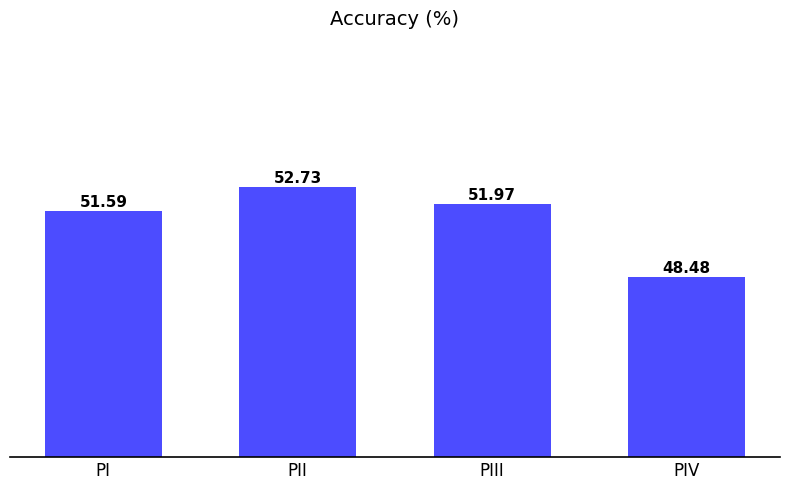

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Dữ liệu
p = pd.Series({
    'PI': 0.515924,
    'PII': 0.527273,
    'PIII': 0.519660,
    'PIV': 0.484848
})

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(p.index, p.values, color="#0000ff", alpha=0.7, width=0.6)

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height + 0.0005,
            f'{100.0*height:.2f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Xóa trục tung và các đường viền
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Giữ lại trục hoành (x-axis)
ax.spines['bottom'].set_linewidth(1.2)
ax.tick_params(axis='x', length=0, labelsize=12)

# Zoom trục y để thấy rõ sự khác biệt nhỏ
ax.set_ylim(0.40, 0.60)

ax.set_title('Accuracy (%)', fontsize=14)

plt.tight_layout()
plt.show()


In [10]:
data = {}

def demoPlot3(file_name):
    df = pd.read_csv(file_name)

    ref_df = pd.read_csv('../C_Generate/postgenerate_gpt.csv')[['link', 'boNganh']]

    df = pd.merge(df, ref_df, on='link', how='left')

    # display(df)

    df['danhGiaDung'] = df['danhGiaDung'].apply(castString)
    df['danhGiaAoGiac'] = df['danhGiaAoGiac'].apply(castString)

    name = file_name.split("/")[-1].split("_evaluate")[0].split('PostProcess_')[-1]

    df_dict = {value: calculate_accuracy(df[df['boNganh'] == value]) for value in df['boNganh'].unique()}

    data[name] = df_dict


In [11]:
for file in file_list:
    demoPlot3(file)
df = pd.DataFrame(data).T
# df.mean().plot(kind='barh')
df = df.mean().to_frame()
df.columns = ['Accuracy']
df

,Accuracy
Bộ Khoa học và Công nghệ ( Bộ TTTT cũ),0.480856
Bộ Tư pháp,0.481105
Bộ Giao thông vận tải,0.487589
Bộ Công an,0.500000
Bộ Y tế,0.492308
Bộ Tài nguyên và Môi trường,0.490854
Bộ Nông nghiệp và Môi trường,0.489379
Bộ Lao động - Thương binh và Xã hội,0.507812
Bộ Nội vụ,0.481771
Bộ Quốc phòng,0.492816
